---
Traffic_Volume in city-in-seasons Dataset Documentation
---
This documentation provides an analysis of the Traffic_Volume in city-in-seasons dataset. The dataset contains information about traffic volume in a city at different time intervals, along with various weather-related features.

# Dataset Description
The Traffic_Volume in city-in-seasons dataset consists of the following columns:

1. *holiday*: Indicates if the day is a holiday or not (categorical: "None" or name of the holiday)
2. *temp*: Temperature in Kelvin (numerical)
3. *rain_1h*: Amount of rain in millimeters within the hour (numerical)
4. *snow_1h*: Amount of snow in millimeters within the hour (numerical)
5. *clouds_all*: Percentage of cloud cover (numerical)
6. *weather_main*: Main weather type (categorical)
7. *weather_description*: Description of the weather (categorical)
8. *date_time*: Date and time of the record (format: "MM/DD/YYYY HH:MM")
9. *traffic_volume*: Number of vehicles passing by the specific location and time (numerical)

# Data Preprocessing
Before performing the analyses, the following data preprocessing steps are applied:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

# Load the Traffic_Volume in city-in-seasons dataset
traffic_volume_seasons_dataset = pd.read_csv('Traffic_Volume.csv')

# Convert date_time column to pandas datetime object
traffic_volume_seasons_dataset['date_time'] = pd.to_datetime(traffic_volume_seasons_dataset['date_time'])


# Analysis
The dataset can be analyzed in several ways to gain insights into the traffic volume patterns and its relationship with different factors.

## Investigating the Impact of Holidays on Traffic Volume
We can investigate the impact of holidays on traffic volume by analyzing the average traffic volume during holidays compared to non-holiday days.

In [2]:
traffic_volume_by_holiday = traffic_volume_seasons_dataset.groupby('holiday')['traffic_volume'].mean()
traffic_volume_by_holiday.to_csv('traffic_volume_by_holiday.txt', sep='\t', index=False)

## Analyzing the Relationship between Temperature and Traffic Volume
We can analyze the relationship between temperature and traffic volume to understand if there is any correlation between them.

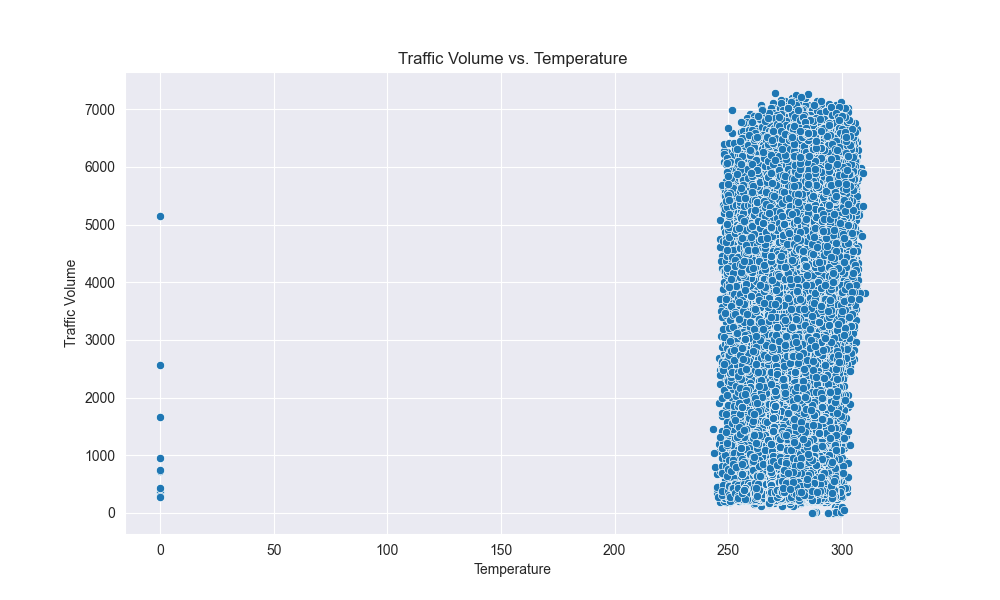

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='traffic_volume', data=traffic_volume_seasons_dataset)
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume vs. Temperature')
plt.savefig('traffic_volume_vs_temperature.png')
plt.close()

display(Image(filename='traffic_volume_vs_temperature.png'))

## Exploring the Impact of Precipitation on Traffic Volume
We can explore how precipitation (rain and snow) affects traffic volume by analyzing their relationship.

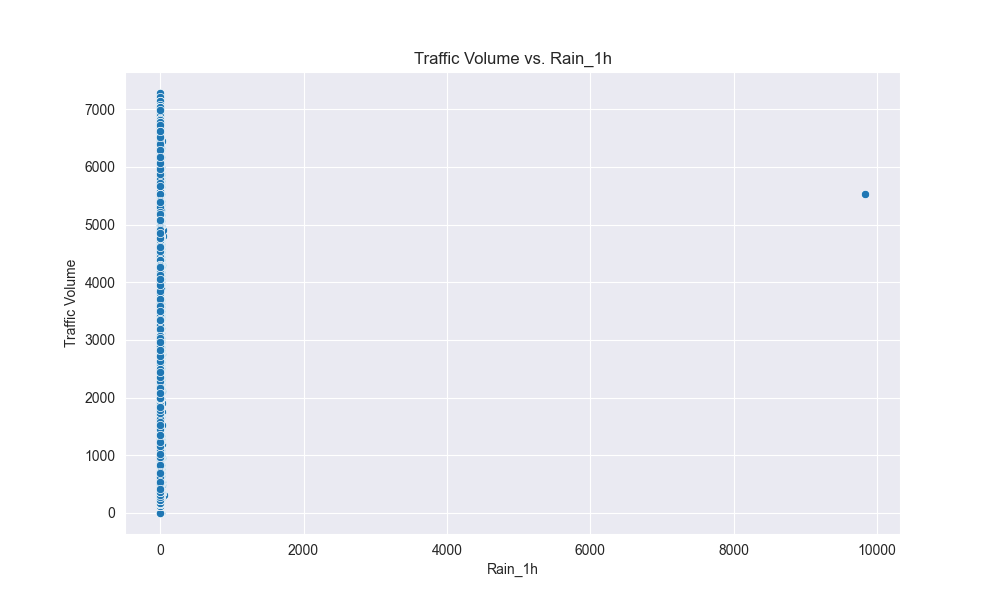

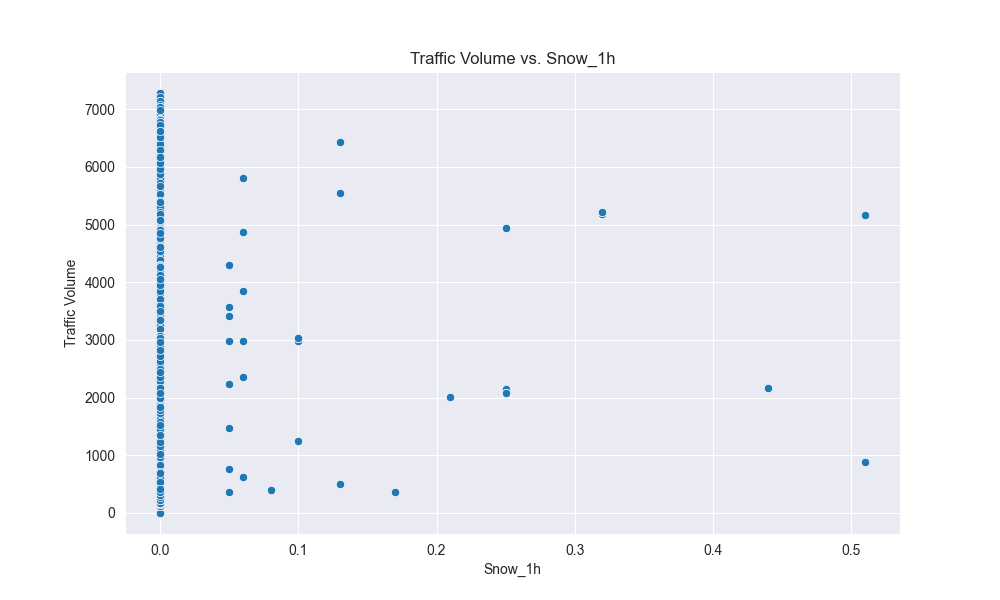

In [4]:
precipitation_columns = ['rain_1h', 'snow_1h']
for column in precipitation_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='traffic_volume', data=traffic_volume_seasons_dataset)
    plt.xlabel(column.capitalize())
    plt.ylabel('Traffic Volume')
    plt.title(f'Traffic Volume vs. {column.capitalize()}')
    plt.savefig(f'traffic_volume_vs_{column}.png')
    plt.close()

    display(Image(filename=f'traffic_volume_vs_{column}.png'))

## Examining the Influence of Cloud Cover, Weather Types, and Descriptions on Traffic Volume
We can examine the influence of cloud cover, weather types, and weather descriptions on traffic volume by analyzing their impact.

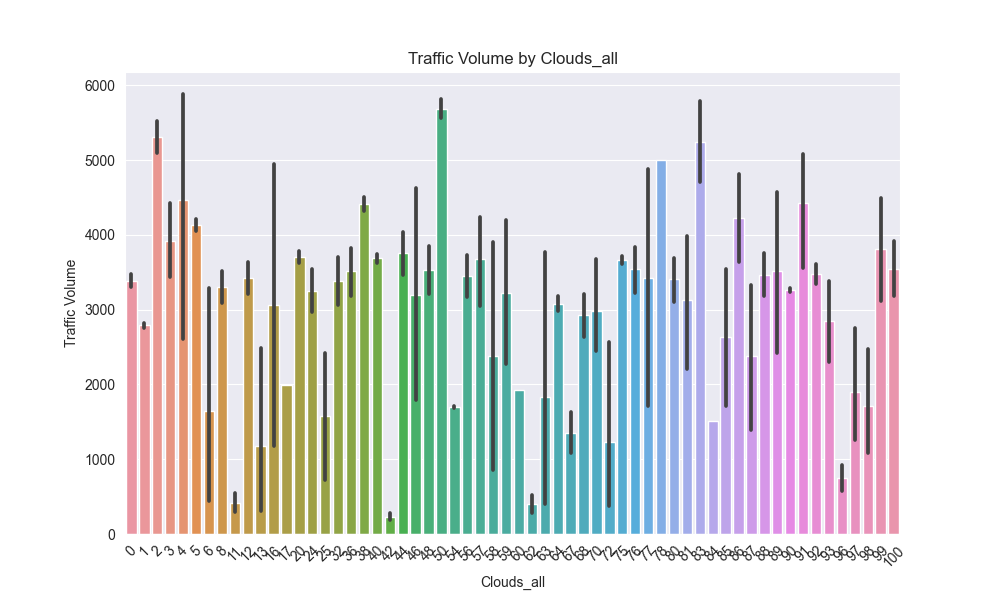

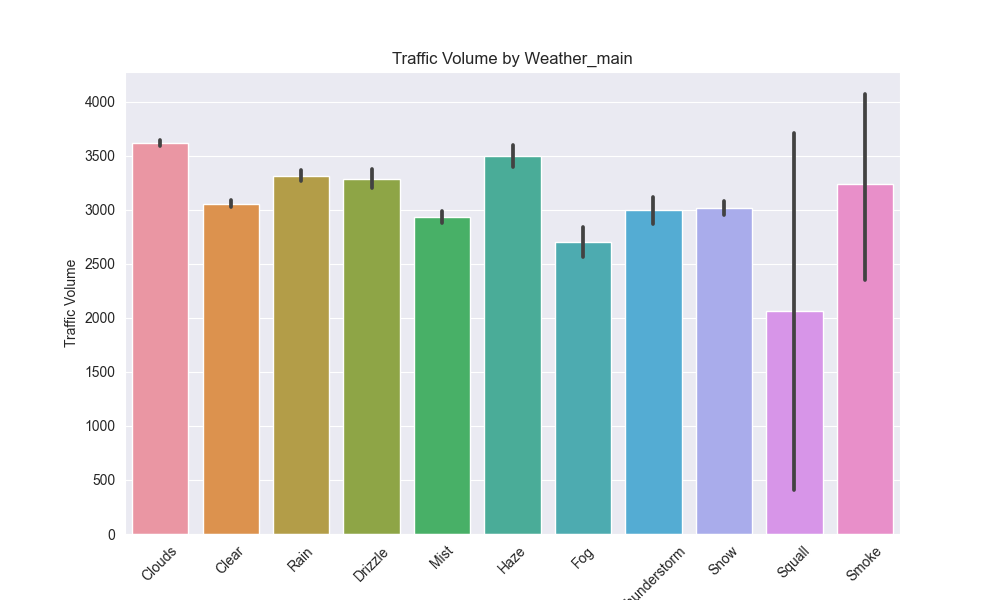

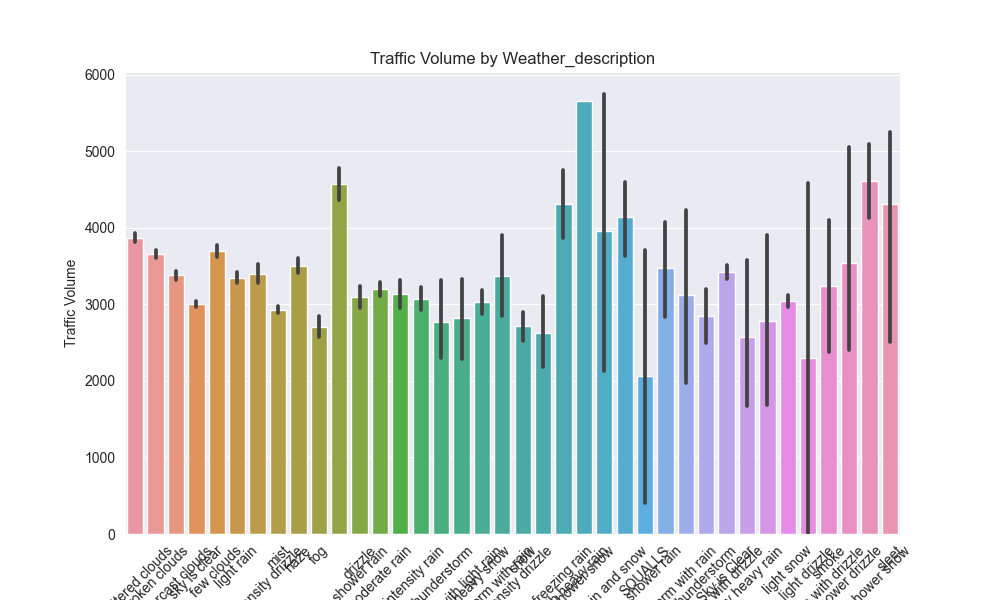

In [5]:
weather_columns = ['clouds_all', 'weather_main', 'weather_description']
for column in weather_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='traffic_volume', data=traffic_volume_seasons_dataset)
    plt.xlabel(column.capitalize())
    plt.ylabel('Traffic Volume')
    plt.title(f'Traffic Volume by {column.capitalize()}')
    plt.xticks(rotation=45)
    plt.savefig(f'traffic_volume_by_{column}.png')
    plt.close()

    display(Image(filename=f'traffic_volume_by_{column}.png'))

## Analyzing the Distribution of Traffic Volume Based on Time Intervals
We can analyze the distribution of traffic volume based on different time intervals (e.g., hour) to identify patterns and trends.

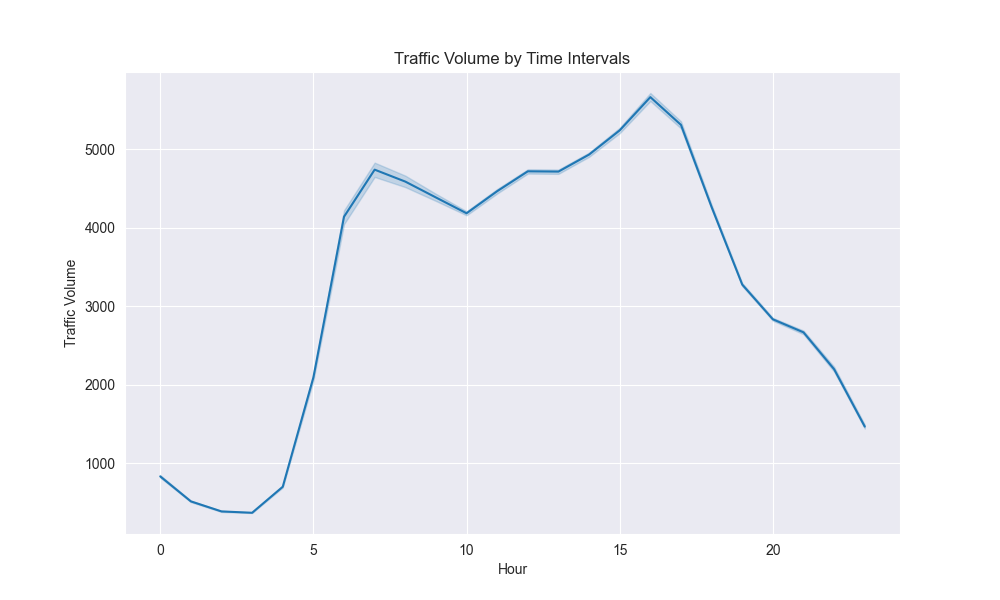

In [6]:
traffic_volume_seasons_dataset['hour'] = traffic_volume_seasons_dataset['date_time'].dt.hour

# Generate a text file for traffic volume by time intervals
traffic_volume_by_time_intervals = traffic_volume_seasons_dataset.groupby('hour')['traffic_volume'].mean()
traffic_volume_by_time_intervals.to_csv('traffic_volume_by_time_intervals.txt', sep='\t', index=False)

# Traffic volume visualization by time intervals
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='traffic_volume', data=traffic_volume_seasons_dataset)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Time Intervals')
plt.savefig('traffic_volume_by_time_intervals.png')
plt.close()

display(Image(filename='traffic_volume_by_time_intervals.png'))

# Correlation Heatmap
To understand the relationships between numerical variables in the dataset, we can create a correlation heatmap. The heatmap visually represents the correlation coefficients between pairs of variables. Higher positive values indicate a positive correlation, while higher negative values indicate a negative correlation.

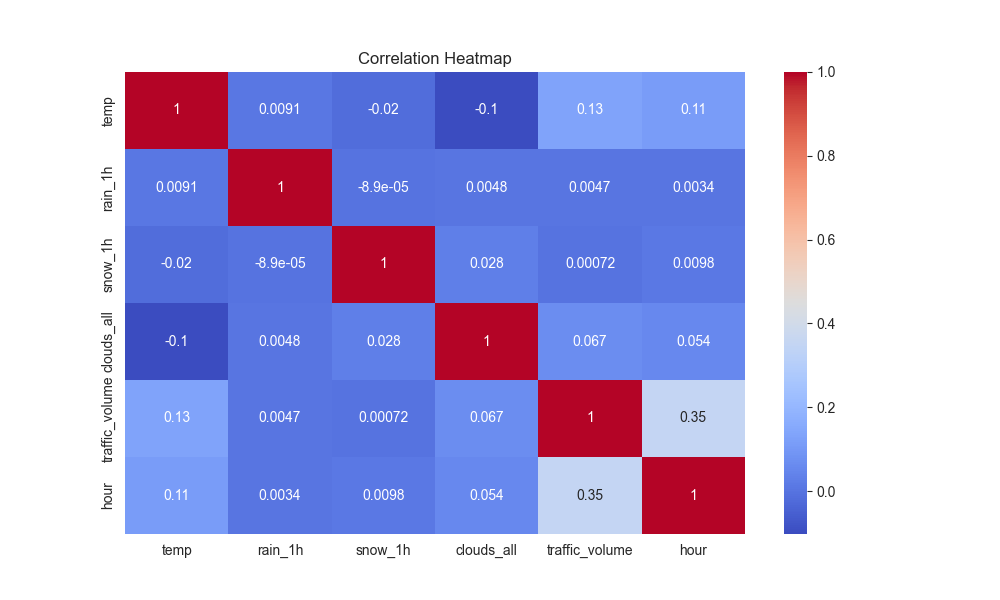

In [7]:
# Create a correlation matrix and plot it as a heatmap
correlation_matrix = traffic_volume_seasons_dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.close()

display(Image(filename='correlation_heatmap.png'))

# Conclusion
The Traffic_Volume in city-in-seasons dataset provides valuable information about traffic volume in a city at different time intervals, along with various weather-related features. By analyzing the dataset, we can gain insights into the impact of holidays, temperature, precipitation, cloud cover, weather types, weather descriptions, and time intervals on traffic volume. These insights can be useful for traffic planning, infrastructure development, and transportation management.